In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('./raw/hmQOVnDvRN.xls')

# Bivariate Analysis

In [124]:
categorical_columns= ['Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod' ]
numerical_columns = [ 'tenure', 'MonthlyCharges', 'TotalCharges']

Partner:
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64

Dependents:
Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64

PhoneService:
PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64

MultipleLines:
MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64

InternetService:
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64

OnlineBackup:
OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64

DeviceProtection:
DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn, dtype: float64

Tec

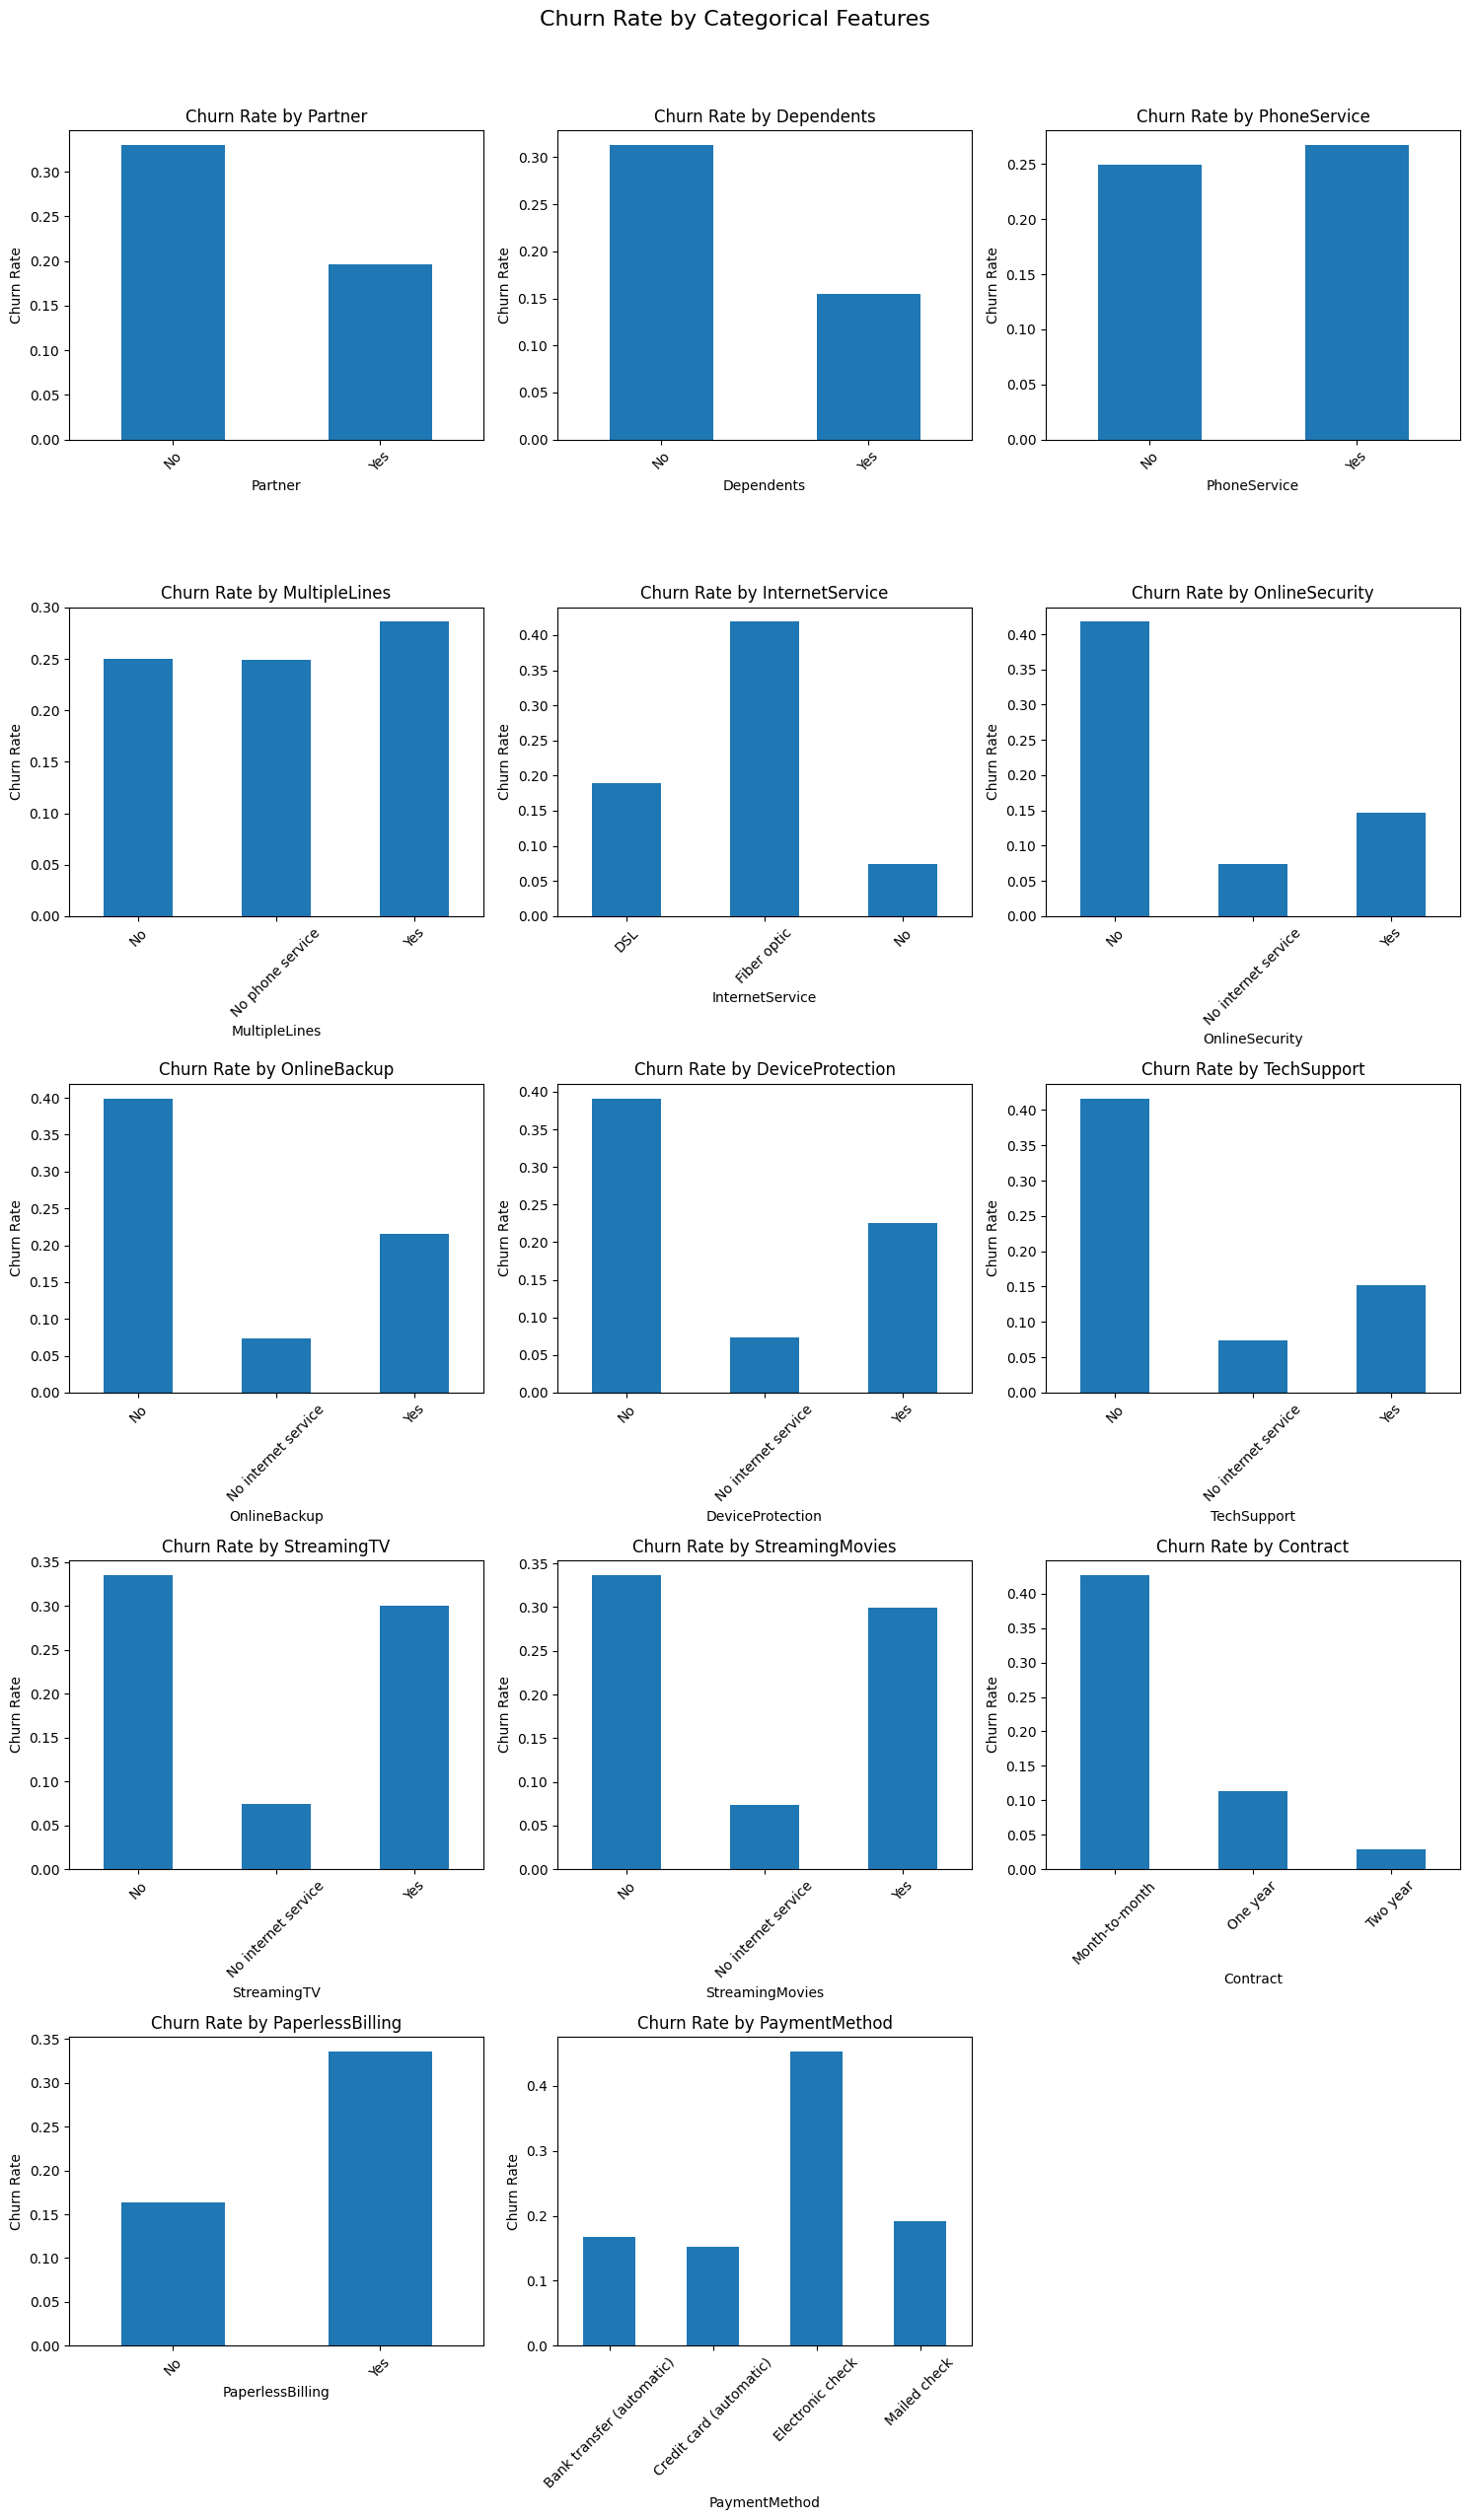

In [125]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


# calculate churn rate for each categorical column and plot in subplots
import math

num_cols = len(categorical_columns)
num_rows = math.ceil(num_cols / 3)  # 3 columns per row
num_cols_grid = min(3, num_cols)

fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15, 5 * num_rows))
fig.suptitle('Churn Rate by Categorical Features', fontsize=16, y=1.02)

# Flatten axes array for easier indexing
if num_rows == 1:
    axes = [axes] if num_cols == 1 else axes
else:
    axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    churn_rates = df.groupby(col)["Churn"].apply(lambda x: (x=="Yes").mean())
    print(f"{col}:")
    print(churn_rates)
    print()
    
    # Select the appropriate subplot
    ax = axes[i]
    churn_rates.plot(kind="bar", ax=ax)
    ax.set_title(f"Churn Rate by {col}")
    ax.set_ylabel("Churn Rate")
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

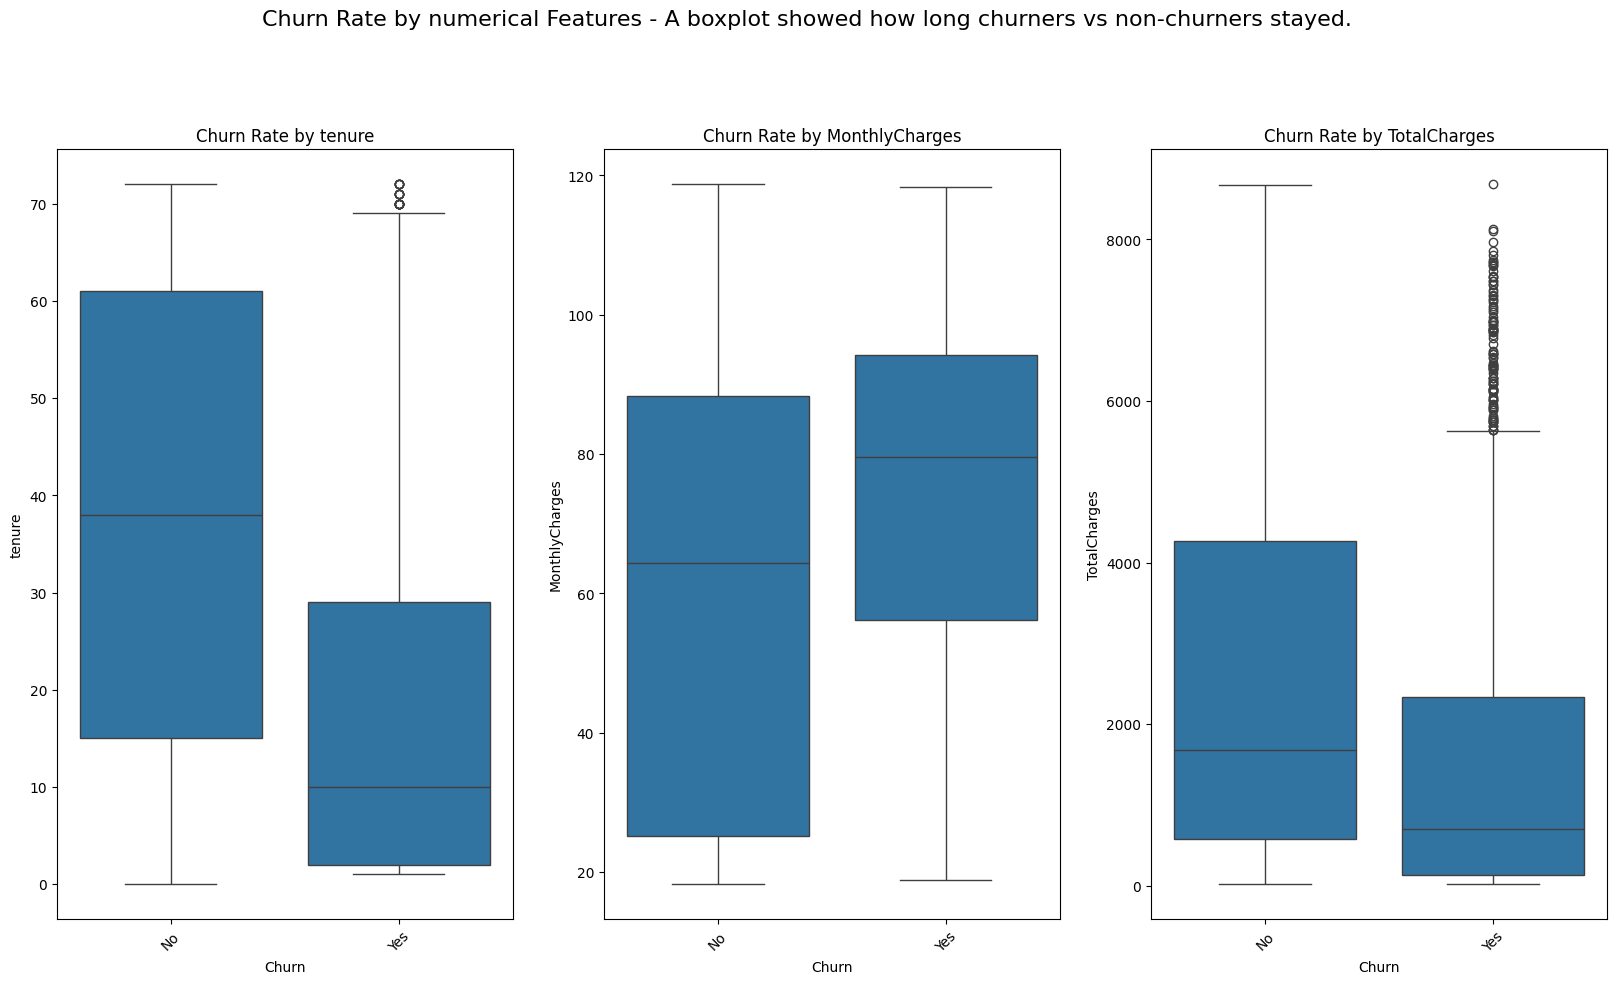

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Churn Rate by numerical Features - A boxplot showed how long churners vs non-churners stayed.', fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x="Churn", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Churn Rate by {col}")
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

In [127]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [128]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].str.strip().isnull().sum())
    else:
        print(col, df[col].isnull().sum())



0
0
SeniorCitizen 0
0
0
tenure 0
0
0
0
0
0
0
0
0
0
0
0
0
MonthlyCharges 0
TotalCharges 11
0


In [129]:
missing_mask = df.isnull() | (df == "") | (df.applymap(lambda x: isinstance(x, str) and x.strip() == ""))
print("Any missing values:", missing_mask.any().any())
print("Missing values per column:\n", missing_mask.sum())


Any missing values: True
Missing values per column:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


/var/folders/n1/3qtzdh9s0nb9z0dcczgz0ddw0000gn/T/ipykernel_15124/3796204701.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_mask = df.isnull() | (df == "") | (df.applymap(lambda x: isinstance(x, str) and x.strip() == ""))


In [130]:
missing_indexes = []
for idx, x in enumerate(df['TotalCharges']):
    if x.strip() == "":
        print(idx)
        missing_indexes.append(idx)


AttributeError: 'float' object has no attribute 'strip'

In [ ]:

for idx, x in enumerate(df['tenure']):
    if x == 0:
        print(idx)


488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


- handling missing values of the TotalCharges by multiply tenure with MonthlyCharges

In [ ]:
for id in missing_indexes:
    df.loc[id, 'TotalCharges'] = df.loc[id, 'tenure'] *  df.loc[id, 'MonthlyCharges'] 

Recheck missing values

In [ ]:
missing_mask = df.isnull() | (df == "") | (df.applymap(lambda x: isinstance(x, str) and x.strip() == ""))
print("Any missing values:", missing_mask.any().any())
print("Missing values per column:\n", missing_mask.sum())


Any missing values: False
Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/var/folders/n1/3qtzdh9s0nb9z0dcczgz0ddw0000gn/T/ipykernel_15124/3796204701.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_mask = df.isnull() | (df == "") | (df.applymap(lambda x: isinstance(x, str) and x.strip() == ""))


In [ ]:
df.head(937)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,5787-KXGIY,Male,0,Yes,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.30,1304.8,No
933,4750-ZRXIU,Female,1,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.60,360.1,Yes
934,4198-VFOEA,Female,0,No,No,12,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,33.60,435.45,No
935,6630-UJZMY,Female,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.25,308.05,No


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank tra

In [ ]:
# df.to_csv('./processed/missing_value_handled.csv', index=False)